# Loan Approval Status Prediction Notebook

<img src="images/loan.png"/>

# Task 1

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import scipy.stats as sp
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

import pickle

from boruta import BorutaPy

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
loan_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


## Perform Basic Exploratory Data Analysis

### Examine & Get Insights on Data

In [3]:
loan_data.shape

(491, 14)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [5]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_data.describe(include='all')

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491.000000,491,481,490,482,491,462,491.000000,491.000000,475.000000,478.000000,448.000000,491,491.000000
unique,NaN,491,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,LP001691,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,NaN,1,393,324,276,388,398,NaN,NaN,NaN,NaN,NaN,186,NaN
mean,245.000000,NaN,NaN,NaN,NaN,NaN,NaN,5401.189409,1589.730998,145.014737,341.297071,0.848214,NaN,0.698574
std,141.883755,NaN,NaN,NaN,NaN,NaN,NaN,6419.427177,2919.320624,86.310534,66.964051,0.359214,NaN,0.459345
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,0.000000
25%,122.500000,NaN,NaN,NaN,NaN,NaN,NaN,2923.500000,0.000000,100.000000,360.000000,1.000000,NaN,0.000000
50%,245.000000,NaN,NaN,NaN,NaN,NaN,NaN,3865.000000,1229.000000,126.000000,360.000000,1.000000,NaN,1.000000
75%,367.500000,NaN,NaN,NaN,NaN,NaN,NaN,5705.500000,2251.500000,162.000000,360.000000,1.000000,NaN,1.000000


In [7]:
#Check data types
loan_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [8]:
# Assessing if duplicated records are found in the dataset
print("Number of duplicated records in training set: ", loan_data.duplicated().sum())

Number of duplicated records in training set:  0


In [9]:
#Drop duplicate rows
loan_data.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)

In [10]:
#Check unique values in the data columns
loan_data.nunique().sort_values(ascending=False)

ApplicantIncome      408
CoapplicantIncome    239
LoanAmount           176
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Loan_Status            2
Credit_History         2
Self_Employed          2
Education              2
Married                2
Gender                 2
dtype: int64

In [11]:
loan_data[loan_data.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
59,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
125,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0
133,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,0
243,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1
360,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1
410,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,1
465,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1
470,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0
475,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1


In [12]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)

In [13]:
loan_data[loan_data.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
38,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
63,Male,Yes,0,Graduate,NaN,3539,1376.0,55.0,360.0,1.0,Rural,0
79,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,1
119,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
132,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural,1
164,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban,1
191,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,0
200,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,1
201,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,1
205,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,1


In [14]:
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

In [15]:
loan_data[loan_data.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
41,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1


In [16]:
loan_data.Married.fillna('No', inplace=True)

In [17]:
loan_data[loan_data.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
41,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
55,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,0
127,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
281,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,0
348,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
357,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
407,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
453,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1


In [18]:
loan_data.Dependents.fillna('0', inplace=True)

In [19]:
loan_data[loan_data.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,0
29,Male,No,0,Not Graduate,No,2699,2785.0,96.0,360.0,NaN,Semiurban,1
38,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,0
74,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,NaN,Rural,1
79,Male,Yes,0,Graduate,No,6256,0.0,160.0,360.0,NaN,Urban,1
116,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,1
119,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,0
124,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,1
126,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,1
140,Male,Yes,0,Graduate,No,2058,2134.0,88.0,360.0,NaN,Urban,1


In [20]:
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

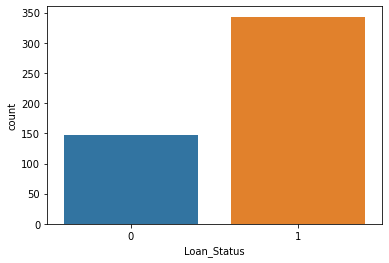

In [21]:
#Inspect for Class Imbalance
sns.countplot(loan_data.Loan_Status)

In [22]:
#Function to plot the variables against the target variable
def plot_composite(data, cols):
    for col in cols:
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(15, 3)
        data[col].hist(ax=ax[0])
        Score_df = pd.crosstab(data[col], data['Loan_Status'])
        Score_df.div(Score_df.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1])
        ax[0].set_xlabel(col, fontsize = 10);
        ax[0].set_ylabel('Counts', fontsize = 10);
        ax[1].set_xlabel(col, fontsize = 10);
        ax[1].set_ylabel('Ratio', fontsize = 10);
        fig.suptitle(col  + ' vs loan_status relationship', fontsize=12)
        fig.subplots_adjust(top=0.9)
        fig.show()

In [23]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

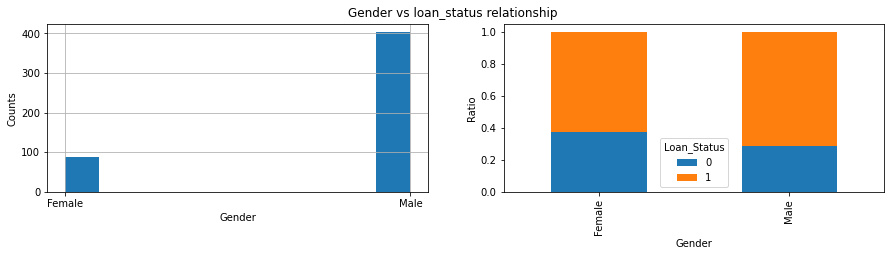

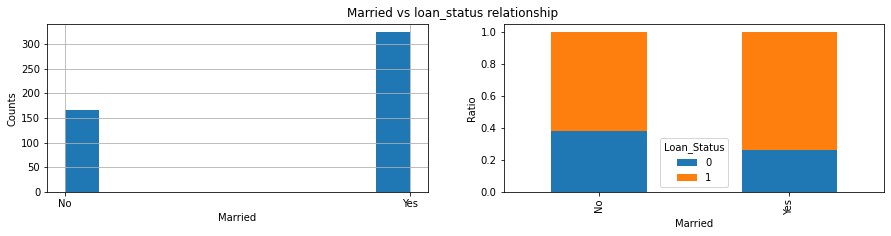

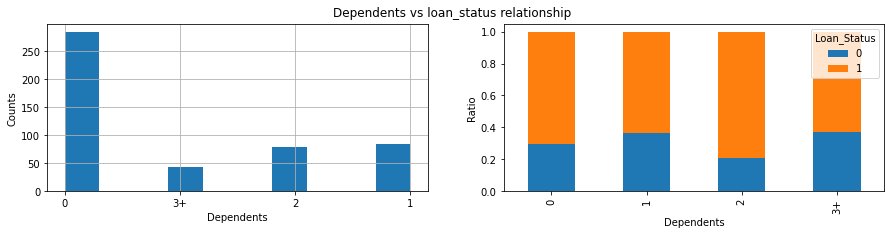

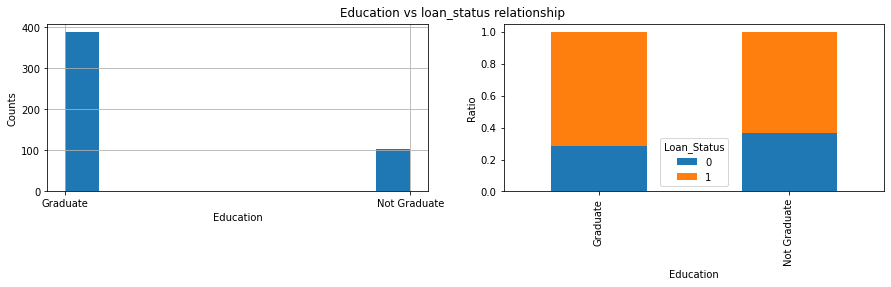

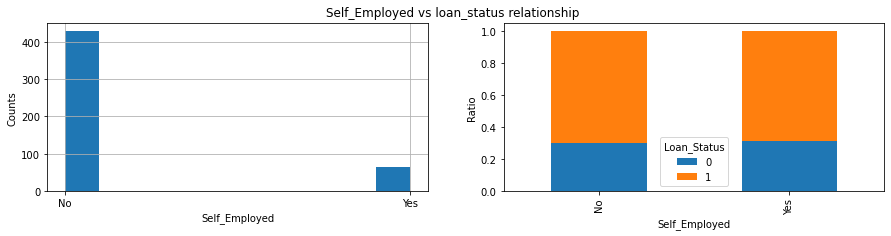

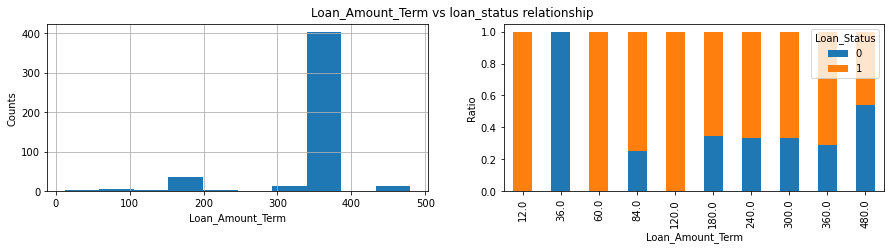

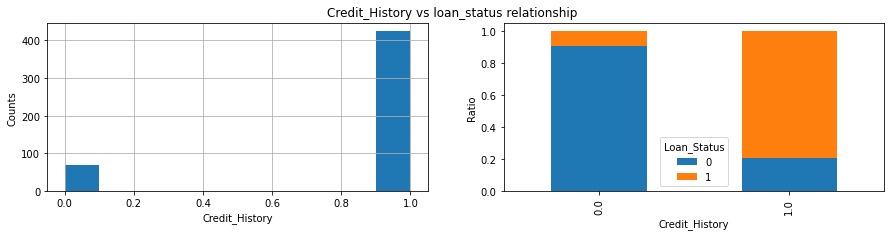

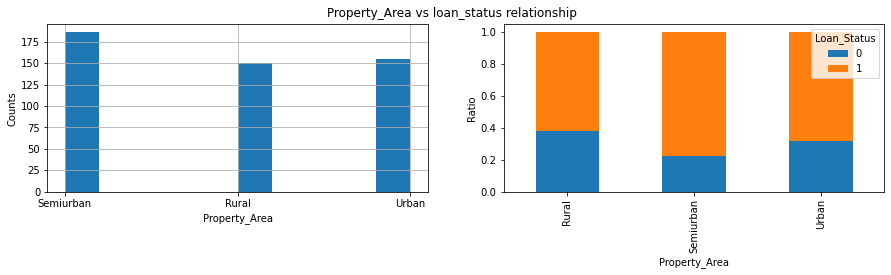

In [24]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plot_composite(loan_data, features)

In [25]:
#Plot the variables against the target variables using groups
def groupplot_comp(data, columns):
    for column in columns:
        info = data[column].max()
        bins= [0, (info * 0.25), (info * 0.5), (info * 0.75), info] 
        group= ['Low', 'Average', 'High', 'Very High']
        data['A'] = pd.cut(data[column], bins, labels=group)
        A= pd.crosstab(data['A'], data['Loan_Status'])
        ax = A.div(A.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
        ax.set_xlabel(column, fontsize = 10);
     

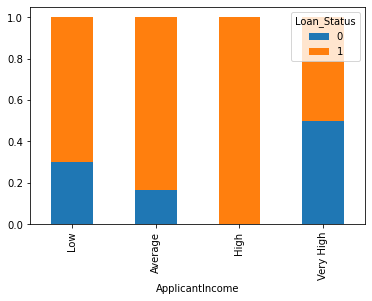

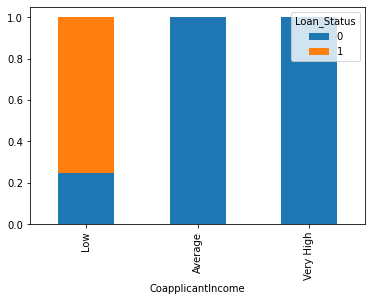

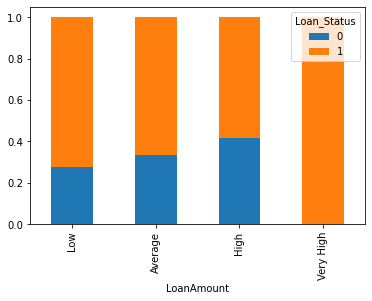

In [26]:
feature =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
groupplot_comp(loan_data, feature )

In [27]:
# Identify potential outliers

info = loan_data.LoanAmount.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    475.000000
mean     145.014737
std       86.310534
min       17.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64
The upper and lower bounds for suspected outliers are 255.0 and 7.0.


<AxesSubplot:>

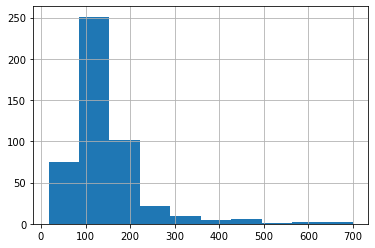

In [28]:
loan_data.LoanAmount.hist()

In [29]:
loan_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
A                    16
dtype: int64

In [30]:
loan_data.shape

(491, 13)

In [31]:
loan_data.drop(loan_data[loan_data.LoanAmount > 225].index,inplace=True)
loan_data.shape

(446, 13)

In [32]:
#Drop rows with null loan amount and loan amount term
loan_data.dropna(inplace=True)

In [33]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,A
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1,Low
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1,Low
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0,Low
5,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,0,Low
7,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,1,Low


In [34]:
# Identify potential outliers

info = loan_data.Loan_Amount_Term.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    417.000000
mean     340.863309
std       68.749986
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64
The upper and lower bounds for suspected outliers are 360.0 and 360.0.


In [35]:
loan_data[loan_data.Loan_Amount_Term > 360]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,A
32,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,1,Low
41,Male,No,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1,Low
61,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,0,Low
67,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,0,Low
224,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1.0,Rural,0,Low
300,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,1,Low
310,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,0,Low
321,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,0,Low
348,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0,Low
377,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,1,Low


In [36]:
loan_data.drop(loan_data[loan_data.LoanAmount > 360].index,inplace=True)
loan_data.shape

(417, 13)

In [37]:
#Drop column created during EDA
loan_data.drop(columns=['A'], inplace=True)

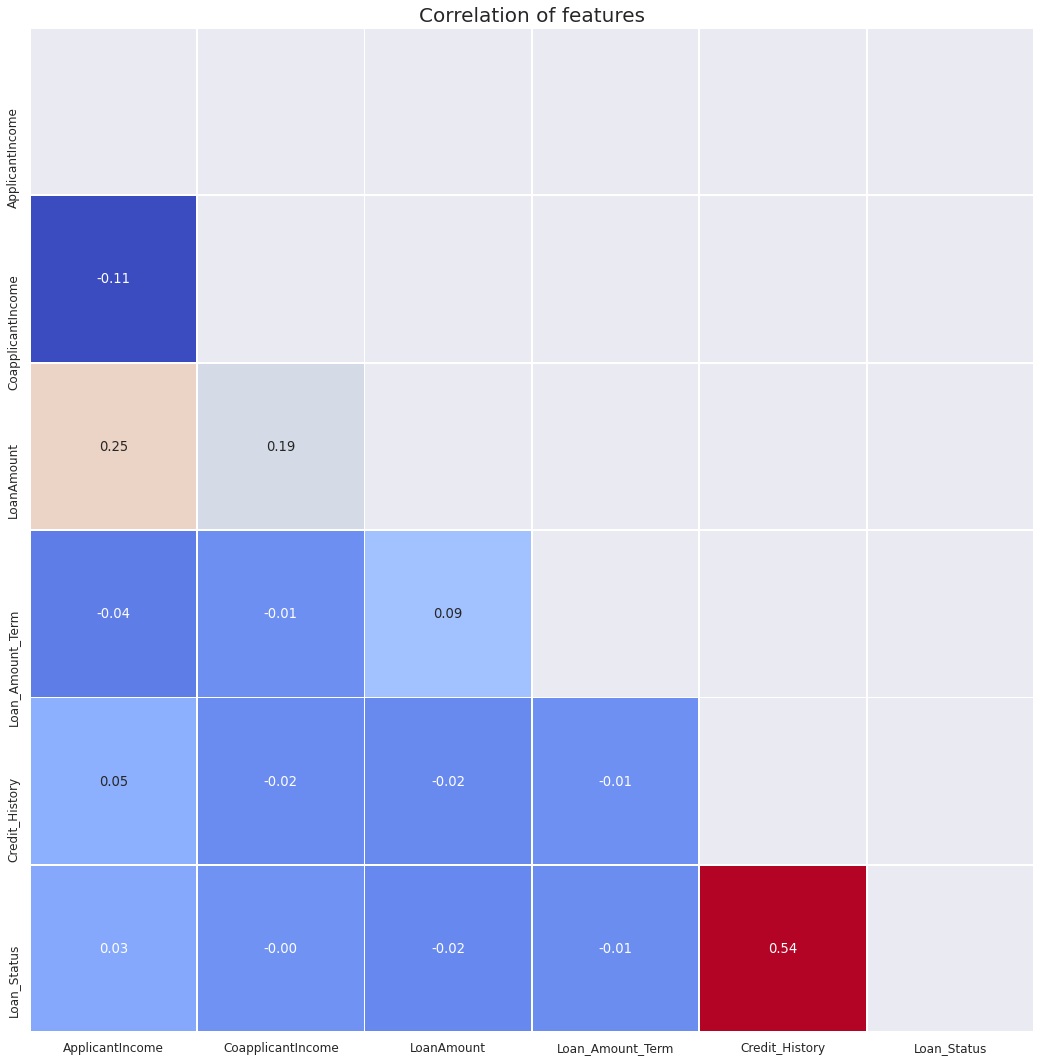

In [38]:
#def heatmap_num(self, datatype):
#        '''Plot heatmap for numerical features correlation'''
#        self.datatype = datatype
sns.set(font_scale=1.1)
correlation_train = loan_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 20))
plt.title('Correlation of features', size=20)
sns.heatmap(correlation_train,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

In [41]:
loan_data1 = loan_data.copy()

In [43]:
#Label Encode features
label_encoder = preprocessing.LabelEncoder()
loan_data['Gender'] = label_encoder.fit_transform(loan_data['Gender'])
loan_data['Married'] = label_encoder.fit_transform(loan_data['Married'])
loan_data['Education'] = label_encoder.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = label_encoder.fit_transform(loan_data['Self_Employed'])
loan_data['Dependents'] = label_encoder.fit_transform(loan_data['Dependents'])
loan_data['Property_Area'] = label_encoder.fit_transform(loan_data['Property_Area'])

## Separate the Input and Target Features of the data

In [52]:
#Separate Input Features
X = (loan_data.drop(['Loan_Status'], axis=1)).copy()

In [53]:
#Separate target feature
y = loan_data.Loan_Status

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [54]:
#Split Data
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 0, stratify=y)

## Scale your data if required

## Treat data for imbalance if required

In [57]:
sm = SMOTE(random_state=0, sampling_strategy= 0.5)

In [58]:
X_train, Y_train =sm.fit_sample(X_train, Y_train)

In [59]:
X_train.shape

(360, 11)

In [60]:
Y_train.value_counts()

1    240
0    120
Name: Loan_Status, dtype: int64

In [63]:
Y_test.value_counts()

1    60
0    24
Name: Loan_Status, dtype: int64

# Task 2

## Build a Logistic Regression Model on train set

In [67]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## Evaluate the model using F1 Score

In [68]:
f1_score(Y_test, model.predict(X_test))

0.8992248062015503

In [69]:
confusion_matrix(Y_test, model.predict(X_test))

array([[13, 11],
       [ 2, 58]])

In [70]:
kfold = model_selection.KFold(n_splits=10, random_state=1)
scoring = 'f1'

acc_model = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_model.mean()

0.8409072251672975

## Build a Decision Tree Classifier Model on train set

In [71]:
model_dtree = DecisionTreeClassifier(random_state = 0)
model_dtree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [72]:
f1_score(Y_test, model_dtree.predict(X_test))

0.7796610169491527

In [73]:
confusion_matrix(Y_test, model_dtree.predict(X_test))

array([[12, 12],
       [14, 46]])

In [74]:
kfold = model_selection.KFold(n_splits=10, random_state=1)
scoring = 'f1'

acc_model = cross_val_score(estimator = model_dtree, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_model.mean()

0.7352731897027918

## Build a RandomForest Classifier Model on train set

In [75]:
model_rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [76]:
f1_score(Y_test, model_rf.predict(X_test))

0.8992248062015503

In [77]:
confusion_matrix(Y_test, model_rf.predict(X_test))

array([[13, 11],
       [ 2, 58]])

In [78]:
kfold = model_selection.KFold(n_splits=10, random_state=1)
scoring = 'f1'

acc_model = cross_val_score(estimator = model_rf, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_model.mean()

0.8420652572600442

## Build a Gradient Boost Classifier Model on train set

In [79]:
model_gbc = GradientBoostingClassifier(random_state=1)
model_gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [80]:
f1_score(Y_test, model_gbc.predict(X_test))

0.8749999999999999

In [81]:
confusion_matrix(Y_test, model_gbc.predict(X_test))

array([[12, 12],
       [ 4, 56]])

## Build a Voting Classifier Model on train set

In [82]:
voting_clf = VotingClassifier(estimators=[('LR', model), ('DTree', model_dtree), ('RFC', model_rf), ('GBC', model_gbc)], voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=1000)),
                             ('DTree', DecisionTreeClassifier(random_state=0)),
                             ('RFC',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=1)),
                             ('GBC',
                              GradientBoostingClassifier(random_state=1))])

In [83]:
f1_score(Y_test, voting_clf.predict(X_test))

0.8818897637795275

In [84]:
confusion_matrix(Y_test, voting_clf.predict(X_test))

array([[13, 11],
       [ 4, 56]])

## Build a XGBoost Classifier Model on train set

In [85]:
model_xgb = XGBClassifier(random_state=1)
model_xgb.fit(X_train, Y_train)

[08:39:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
f1_score(Y_test, model_xgb.predict(X_test))

0.7966101694915254

In [87]:
confusion_matrix(Y_test, model_xgb.predict(X_test))

array([[13, 11],
       [13, 47]])

### Random Forest Hypertuning

In [88]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15, 20, 25, 40],
    'n_estimators': [20, 40, 60, 80, 100, 200], 
    'max_features': ['auto', 'sqrt', 'log2']}

In [89]:

rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [90]:
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   14.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, 25, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100, 200]},
             verbose=2)

In [91]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 80}

In [92]:
f1_score(Y_test, grid_search_rf.predict(X_test))

0.8640000000000001

In [93]:
confusion_matrix(Y_test, grid_search_rf.predict(X_test))

array([[13, 11],
       [ 6, 54]])

### Decision Tree

In [94]:

from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 40, 60, 80, 100, 200],
    'min_samples_split': [2, 4, 6, 8, 10]}

In [95]:
#Use GridSearchCv for Decision Tree with random_state = 1
dt = DecisionTreeClassifier(random_state = 1)

# Grid search cv
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [96]:
grid_search_dt.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80, 100, 200],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=2)

In [97]:
grid_search_dt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}

In [98]:
f1_score(Y_test, grid_search_dt.predict(X_test))

0.8455284552845528

In [99]:
confusion_matrix(Y_test, grid_search_dt.predict(X_test))

array([[13, 11],
       [ 8, 52]])

### Gradient Boost

In [100]:
#Use GridSearchCv for Gradient Boost with random_state = 1
# Create the parameter grid based on the results of random search 
param_grid_gbc = {
    'max_depth': [10, 20, 30, 40],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [10, 100, 200, 400],}

In [101]:
#Use GridSearchCv for Gradient Boost with random_state = 1
gbc = GradientBoostingClassifier(random_state=1)

# Grid search cv
grid_search_gbc = GridSearchCV(estimator = gbc, param_grid = param_grid_gbc, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [102]:
grid_search_gbc.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   13.9s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [10, 20, 30, 40],
                         'n_estimators': [10, 100, 200, 400]},
             verbose=2)

In [103]:
grid_search_gbc.best_params_

{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}

In [104]:
f1_score(Y_test, grid_search_gbc.predict(X_test))

0.8000000000000002

In [105]:
confusion_matrix(Y_test, grid_search_gbc.predict(X_test))

array([[12, 12],
       [12, 48]])

### XGBoost Hypertuning

In [106]:
#Use GridSearchCv for Gradient Boost with random_state = 1
# Create the parameter grid based on the results of random search 
param_grid_xgb = {
    'max_depth': [3, 9, 21], 
    'gamma': [1, 3, 9], 'reg_alpha': [20, 60, 120],
    'colsample_bytree' : [0.5, 1], 'min_child_weight' : [0, 4, 8, 10],
    'n_estimators': [10, 100, 400]}

In [107]:
#Use GridSearchCv for XGBoost with random_state = 1
model_xgb = XGBClassifier(random_state=1)

# Grid search cv
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid_xgb, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [108]:
grid_search_xgb.fit(X_train, Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.5min


[08:43:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  3.3min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [109]:
grid_search_xgb.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 10,
 'reg_alpha': 20}

In [110]:
f1_score(Y_test, grid_search_xgb.predict(X_test))

0.9076923076923077

In [111]:
confusion_matrix(Y_test, grid_search_xgb.predict(X_test))

array([[13, 11],
       [ 1, 59]])

In [112]:
voting_clf_grid = VotingClassifier(estimators=[('LR', model), ('DTree', grid_search_dt), ('RFC', grid_search_rf), ('GBC', grid_search_gbc)], voting='hard')
voting_clf_grid.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1049 out of 1080 | elapsed:   10.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   13.9s finished


VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=1000)),
                             ('DTree',
                              GridSearchCV(cv=5,
                                           estimator=DecisionTreeClassifier(random_state=1),
                                           n_jobs=-1,
                                           param_grid={'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [10, 20, 40,
                                                                     60, 80,
                                                                     100, 200],
                                                       'min_samples_split': [2,
                                                                             4,
                                                                             6,
                                                         

In [113]:
f1_score(Y_test, voting_clf_grid.predict(X_test))

0.8548387096774193

In [114]:
confusion_matrix(Y_test, voting_clf_grid.predict(X_test))

array([[13, 11],
       [ 7, 53]])

## Random Forest with Boruta Feature Selection Technique

In [115]:
#Feature Selection with Boruta
rfc = RandomForestClassifier(bootstrap= False, max_depth= 25, max_features ='auto',
 n_estimators = 100, random_state=1)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1) 
boruta_selector.fit(np.array(X_train), np.array(Y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(bootstrap=False, max_depth=25,
                                          n_estimators=8,
                                          random_state=RandomState(MT19937) at 0x7FC8B91BD940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FC8B91BD940, verbose=2)

In [116]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
9,Credit_History,1
5,ApplicantIncome,2
7,LoanAmount,3
6,CoapplicantIncome,4
10,Property_Area,5
8,Loan_Amount_Term,6
2,Dependents,7
1,Married,8
0,Gender,9
3,Education,10


In [117]:
#Create data frame with only selected features
X_imp_train = boruta_selector.transform(np.array(X_train))
X_imp_test = boruta_selector.transform(np.array(X_test))

In [118]:
# Build Model and train data with the most important features
rf_imp = RandomForestClassifier(bootstrap= False, max_depth= 25, max_features ='auto',
 n_estimators = 100, random_state=1, n_jobs = -1)

rf_imp.fit(X_imp_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=25, n_jobs=-1, random_state=1)

In [119]:
f1_score(Y_test, rf_imp.predict(X_imp_test))

0.9076923076923077

In [120]:
confusion_matrix(Y_test, rf_imp.predict(X_imp_test))

array([[13, 11],
       [ 1, 59]])

## Hypertuned Random Forest with Recursive Feature Selection Technique

In [121]:
rf_rfe = RandomForestClassifier(bootstrap= False, max_depth= 25, max_features ='auto',
 n_estimators = 100, random_state=1,)
rf_rfe_bm = rf_rfe.fit(X_train, Y_train)

In [122]:
#compute predicted values
Y_pred = rf_rfe_bm.predict(X_test)

#Calculate metrics
#acc = accuracy_score(y_test, y_pred)
fscore = f1_score(Y_test, Y_pred)

#print("Model Accuracy baseline:", acc)
print("Model F1 Score baseline:", fscore)

Model F1 Score baseline: 0.8264462809917356


In [123]:
#importing RFE class from sklearn library
from sklearn.feature_selection import RFE 

rfe = RFE(estimator= rf_rfe , step = 1) 

# Fit the function for ranking the features
fit = rfe.fit(X_train, Y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False  True  True  True  True  True False]
Feature Ranking: [5 4 2 6 7 1 1 1 1 1 3]


In [124]:
rfe_selected_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
rfe_selected_features.sort_values(by='Ranking')

,Feature,Ranking
5,ApplicantIncome,1
6,CoapplicantIncome,1
7,LoanAmount,1
8,Loan_Amount_Term,1
9,Credit_History,1
2,Dependents,2
10,Property_Area,3
1,Married,4
0,Gender,5
3,Education,6


In [125]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
rf_rfe_model = rf_rfe.fit(X_train_rfe, Y_train)

In [126]:
# making predictions and evaluating the model
y_pred_rfe = rf_rfe_model.predict(X_test_rfe)

#rfe_acc = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(Y_test ,y_pred_rfe)

#print("RFE Model Accuracy:", rfe_acc)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model F1 Score: 0.8166666666666667


In [127]:
models = {'Logistic Regression': model, 'Decision Tree Classifier': model_dtree, 'Random Forest Classifier': model_rf, 'Gradient Boost': model_gbc, 'Voting Classifier': voting_clf, 'Hypertuned Random Forest': grid_search_rf, 
          'Hypertuned Decision Tree': grid_search_dt, 'Hypertuned Gradient Boost': grid_search_gbc, 'Hypertuned XGBoost': grid_search_xgb, 'Hypertuned Voting Classifier': voting_clf_grid}

test_data = [X_test, X_test, X_test, X_test, X_test, X_test, X_test, X_test, X_test, X_test]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, f1_score(Y_test, value.predict(test_data[exp-1]))])
  exp += 1

In [128]:

df = pd.DataFrame(model_performance, columns=['experiment no.:', 'experiment name', 'f1 score'])
df

,experiment no.:,experiment name,f1 score
0,1,Logistic Regression,0.899225
1,2,Decision Tree Classifier,0.779661
2,3,Random Forest Classifier,0.899225
3,4,Gradient Boost,0.875000
4,5,Voting Classifier,0.881890
5,6,Hypertuned Random Forest,0.864000
6,7,Hypertuned Decision Tree,0.845528
7,8,Hypertuned Gradient Boost,0.800000
8,9,Hypertuned XGBoost,0.907692
9,10,Hypertuned Voting Classifier,0.854839


In [129]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master//Loan_Data/loan_test.csv')

In [130]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [131]:
test_data.shape

(123, 12)

In [132]:
test_data.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [133]:
test_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,123,120,121,117,123,120,123.000000,123.000000,117.000000,122.000000,116.000000,123
unique,123,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002832,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,1,96,74,69,92,102,NaN,NaN,NaN,NaN,NaN,47
mean,NaN,NaN,NaN,NaN,NaN,NaN,5412.520325,1747.048780,152.085470,344.754098,0.818966,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4691.249575,2962.400129,82.703623,57.499021,0.386717,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,0.000000,9.000000,60.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2664.000000,0.000000,104.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3601.000000,1014.000000,131.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6110.500000,2413.000000,180.000000,360.000000,1.000000,NaN


In [134]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [135]:
# Assessing if duplicated records are found in the dataset
print("Number of duplicated records in training set: ", test_data.duplicated().sum())

Number of duplicated records in training set:  0


In [136]:
#Check unique values in the data columns
test_data.nunique().sort_values(ascending=False)

Loan_ID              123
ApplicantIncome      118
LoanAmount            86
CoapplicantIncome     63
Loan_Amount_Term       6
Dependents             4
Property_Area          3
Credit_History         2
Self_Employed          2
Education              2
Married                2
Gender                 2
dtype: int64

In [137]:
#Drop duplicate rows
test_data.drop(columns=['Loan_ID'], inplace=True)
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [138]:
test_data[test_data.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
66,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban
105,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural
108,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural


In [139]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)

In [140]:
test_data[test_data.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
42,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban
53,Male,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural
112,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban


In [141]:
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

In [142]:
test_data[test_data.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
29,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
48,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban


In [143]:
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)

In [144]:
test_data['Loan_Amount_Term'].value_counts()

360.0    108
180.0      9
480.0      2
60.0       1
300.0      1
240.0      1
Name: Loan_Amount_Term, dtype: int64

In [145]:
test_data[test_data.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
26,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
29,Female,Yes,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
39,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban
48,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban
73,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban
106,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban


In [146]:
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

In [147]:
test_data[test_data.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
31,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural
45,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural
57,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban
64,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural
67,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban
103,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban
120,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban


In [148]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

In [149]:
test_data[test_data.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
11,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban
26,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
29,Female,Yes,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
33,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban
61,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban
119,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural


In [150]:
# Identify potential outliers

info = test_data.LoanAmount.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    117.000000
mean     152.085470
std       82.703623
min        9.000000
25%      104.000000
50%      131.000000
75%      180.000000
max      570.000000
Name: LoanAmount, dtype: float64
The upper and lower bounds for suspected outliers are 294.0 and -10.0.


In [151]:
test_data['LoanAmount'].median()

131.0

In [152]:
test_data['LoanAmount'].fillna(131.0, inplace=True)

In [153]:
test_data[test_data.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban


In [154]:
# Identify potential outliers

info = test_data.Loan_Amount_Term.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    122.000000
mean     344.754098
std       57.499021
min       60.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64
The upper and lower bounds for suspected outliers are 360.0 and 360.0.


In [155]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [156]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [157]:
test_data1 = test_data.copy()

In [158]:
label_encoder = preprocessing.LabelEncoder()
test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])
test_data['Married'] = label_encoder.fit_transform(test_data['Married'])
test_data['Education'] = label_encoder.fit_transform(test_data['Education'])
test_data['Self_Employed'] = label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Dependents'] = label_encoder.fit_transform(test_data['Dependents'])
test_data['Property_Area'] = label_encoder.fit_transform(test_data['Property_Area'])

In [163]:
test_data.shape

(123, 11)

In [164]:
loan_data.shape

(417, 12)

In [165]:
#Ensure training and test data have equal number of features
for i in list(X_train):
    if i not in list(test_data):
        test_data[i] = 0

In [168]:
#Generate predictions
predictions = model_rf.predict(test_data)
predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [169]:
#Export predictions to csv
res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)  

In [170]:
#Calculate the ratio of target values
res.prediction.value_counts()

1    100
0     23
Name: prediction, dtype: int64

In [171]:
#Export model file
with open('loan_model_rf.pickle', 'wb') as file:
    pickle.dump(model_rf, file)

In [172]:
import json
columns = {
    'data_columns' : [col.lower()for col in X_train.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))